In [1]:
!which python

/home/paperspace/anaconda3/envs/fastai/bin/python


In [2]:
import enum
import math
import pdb
import platform
import time

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm_notebook

from ssdmultibox.criterion import SSDLoss
from ssdmultibox.datasets import PascalDataset, TrainPascalFlatDataset, device
from ssdmultibox.models import SSDModel
from ssdmultibox import utils

import matplotlib.pyplot as plt
plt.ion()

In [3]:
device

device(type='cuda', index=0)

In [6]:
losses = {'total':[], 'loc':[], 'conf':[]}

In [7]:
model = SSDModel().to(device)

In [12]:
LR = 1e-2

criterion = SSDLoss(alpha=10)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=0.0005)
current_time = time.time()

In [13]:
train_dataset = TrainPascalFlatDataset()

len(train_dataset)

2501

In [14]:
NUM_WORKERS = utils.get_cpu_count()

if platform.system() == 'Darwin': # Mac
    BATCH = 4
    SHUFFLE = False
else:
    BATCH = 32
    SHUFFLE = True
    
dataloader = DataLoader(train_dataset, batch_size=BATCH, shuffle=SHUFFLE, num_workers=NUM_WORKERS)

vars(dataloader)

{'dataset': <ssdmultibox.datasets.TrainPascalFlatDataset at 0x7feeaecd8f98>,
 'batch_size': 32,
 'num_workers': 8,
 'collate_fn': <function torch.utils.data.dataloader.default_collate(batch)>,
 'pin_memory': False,
 'drop_last': False,
 'timeout': 0,
 'worker_init_fn': None,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x7fee8eed17b8>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x7fee8eed1860>,
 '_DataLoader__initialized': True}

In [19]:
EPOCHS = 2

for epoch in range(EPOCHS):
    steps = math.ceil(len(train_dataset) / BATCH)
    for step in tqdm_notebook(range(steps)):
        image_ids, ims, gt_bbs, gt_cats = next(iter(dataloader))

        # put data on device
        ims, gt_bbs, gt_cats = PascalDataset.to_device(ims, gt_bbs, gt_cats)

        # zero out gradients
        optimizer.zero_grad()

        # forward pass
        preds = model(ims)
        loss, loc_loss, conf_loss = criterion(preds, (gt_bbs, gt_cats))

        # backward pass
        loss.backward()
        optimizer.step()

        # stats
        if step % 5 == 0:
            print('epoch: {} step: {} loss: {:.4f} time: {:.4f}'.format(
                epoch, step, loss.item(), time.time() - current_time))
            current_time = time.time()
            losses['total'].append(loss.item())
            losses['loc'].append(loc_loss.item())
            losses['conf'].append(conf_loss.item())

pos_loss: 893.5409 neg_hard_mining_loss: 425.4744
n: 248.0 bbs_loss: 46.9698 cats_loss: 1319.0155
epoch: 0 step: 0 loss: 5.5080 time: 77.3339
pos_loss: 990.2482 neg_hard_mining_loss: 478.5036
n: 285.0 bbs_loss: 42.6543 cats_loss: 1468.7517
pos_loss: 809.1314 neg_hard_mining_loss: 388.7406
n: 226.0 bbs_loss: 38.5262 cats_loss: 1197.8719
pos_loss: 915.4485 neg_hard_mining_loss: 398.2912
n: 240.0 bbs_loss: 43.0981 cats_loss: 1313.7395
pos_loss: 743.3666 neg_hard_mining_loss: 363.3940
n: 218.0 bbs_loss: 39.7086 cats_loss: 1106.7606
pos_loss: 779.0836 neg_hard_mining_loss: 374.5736
n: 225.0 bbs_loss: 40.2392 cats_loss: 1153.6573
epoch: 0 step: 5 loss: 5.3062 time: 11.9474
pos_loss: 688.7559 neg_hard_mining_loss: 299.7792
n: 175.0 bbs_loss: 32.4799 cats_loss: 988.5352
pos_loss: 1020.8809 neg_hard_mining_loss: 480.5569
n: 301.0 bbs_loss: 58.5687 cats_loss: 1501.4377
pos_loss: 777.2703 neg_hard_mining_loss: 352.8805
n: 224.0 bbs_loss: 38.6081 cats_loss: 1130.1505
pos_loss: 724.1661 neg_hard_mi

pos_loss: 951.7229 neg_hard_mining_loss: 271.6410
n: 249.0 bbs_loss: 49.0888 cats_loss: 1223.3639
pos_loss: 786.2198 neg_hard_mining_loss: 251.4482
n: 212.0 bbs_loss: 52.0973 cats_loss: 1037.6681


pos_loss: 927.5785 neg_hard_mining_loss: 325.4001
n: 251.0 bbs_loss: 35.4301 cats_loss: 1252.9786
epoch: 1 step: 0 loss: 5.1331 time: 9.2697
pos_loss: 840.9539 neg_hard_mining_loss: 285.3882
n: 233.0 bbs_loss: 38.6636 cats_loss: 1126.3419
pos_loss: 1035.2356 neg_hard_mining_loss: 315.6833
n: 284.0 bbs_loss: 49.2479 cats_loss: 1350.9187
pos_loss: 989.4608 neg_hard_mining_loss: 270.9008
n: 258.0 bbs_loss: 46.4730 cats_loss: 1260.3615
pos_loss: 926.6482 neg_hard_mining_loss: 276.7546
n: 257.0 bbs_loss: 44.2190 cats_loss: 1203.4031
pos_loss: 769.4185 neg_hard_mining_loss: 254.0997
n: 221.0 bbs_loss: 46.7372 cats_loss: 1023.5181
epoch: 1 step: 5 loss: 4.8428 time: 12.3708
pos_loss: 1022.3406 neg_hard_mining_loss: 284.2688
n: 247.0 bbs_loss: 32.6987 cats_loss: 1306.6095
pos_loss: 695.3846 neg_hard_mining_loss: 225.1006
n: 186.0 bbs_loss: 35.7299 cats_loss: 920.4852
pos_loss: 751.0657 neg_hard_mining_loss: 238.1349
n: 209.0 bbs_loss: 34.3208 cats_loss: 989.2007
pos_loss: 1022.0169 neg_hard_mi

pos_loss: 1045.1224 neg_hard_mining_loss: 295.4938
n: 287.0 bbs_loss: 38.8394 cats_loss: 1340.6161
pos_loss: 975.8823 neg_hard_mining_loss: 279.8924
n: 275.0 bbs_loss: 39.8698 cats_loss: 1255.7744


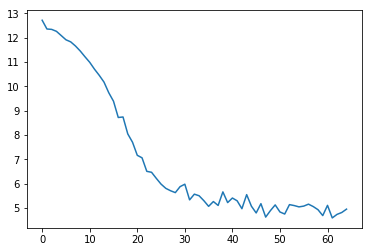

In [20]:
plt.plot(losses['total'])

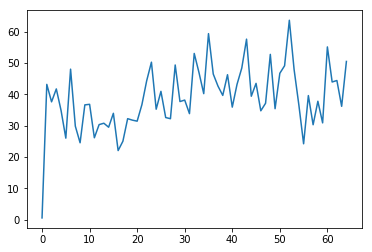

In [21]:
plt.plot(losses['loc'])

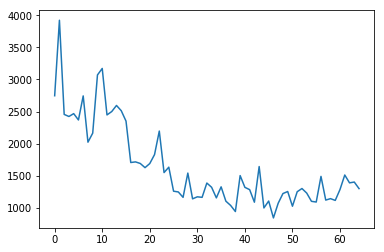

In [23]:
plt.plot(losses['conf'])

In [24]:
utils.save_model(model)

model saved at: model_checkpoints/model-2018-12-08T14:27:19.cpkt


In [25]:
bbs_preds, cats_preds = preds

In [26]:
from ssdmultibox.plotting import *

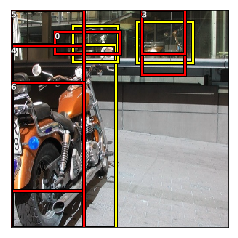

In [30]:
idx = 1
dataset = train_dataset

plot_anchor_bbs(dataset, image_ids, idx, gt_cats)

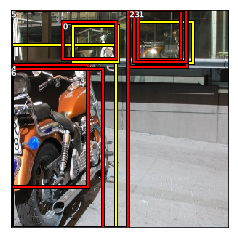

In [31]:
plot_preds(dataset, image_ids, idx, bbs_preds, gt_cats)

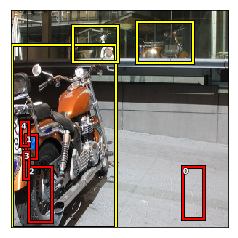

In [32]:
plot_nms_preds(dataset, image_ids, idx, preds, limit=5)